# Fake News Classification and Interpretability

[This notebook](https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-87-accuracy) reports a ``99.87%`` accuracy.

Using the __actual word vectors__ in classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

In [2]:
fake_data = pd.read_csv('./data/Fake.csv', 
                            header=0, 
                            encoding = "utf8")

In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data = pd.read_csv('./data/True.csv', 
                            header=0, 
                            encoding = "utf8")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data['label'] = 0
fake_data['label'] = 1

In [6]:
data = pd.concat([true_data, fake_data])

data = data.sample(frac=1, random_state = 2020)
data.shape

(44898, 5)

In [7]:
data['content'] = data.title + data.text

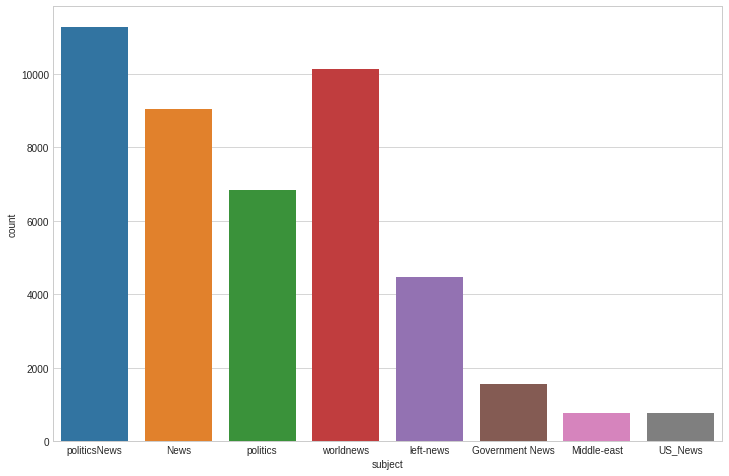

In [8]:

plt.figure(figsize = (12,8))
sns.countplot(data.subject)

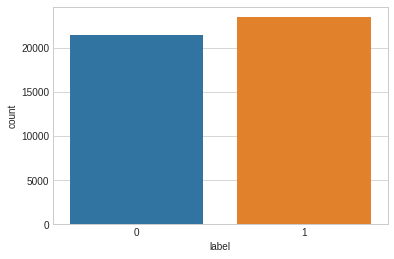

In [9]:
import seaborn as sns
# plt.figure(figsize = (12,8))
sns.countplot(data.label)

In [10]:
data.to_csv('./data/fake_news_20200824.csv')

# Text Preprocessing

In [11]:
import textacy
#import en_core_web_sm
nlp = textacy.load_spacy_lang("en_core_web_md")

import re

## Identify NERs

In [12]:
# def ner_replace(text):
#     doc = textacy.make_spacy_doc(text,lang=nlp)
#     entities={}
#     for i in doc.ents:
#         entities[str(i)] = i.label_
#     new_doc = doc.text
#     for k in sorted(entities.keys(), key = len, reverse = True):
#         new_doc = new_doc.replace(k, entities[k])
#     return(new_doc)

## Identify NPs

In [13]:
# import textacy.ke
# def np_replace(text):
#     doc = textacy.make_spacy_doc(text,lang=nlp)
#     chunk_lst = [t[0] for t in (textacy.ke.textrank(doc, normalize="lemma", topn=10)) if (len(t[0]) > 1)]
#     replace_lst = ['-'.join(t.split()) for t in chunk_lst]

#     replace_dict = dict(zip(chunk_lst, replace_lst))

#     new_doc = doc.text
#     for k in sorted(replace_dict.keys(), key = len, reverse = True):
#         new_doc = new_doc.replace(k, replace_dict[k])
#     return(new_doc)

## Clean Text
- Remove HTML tags
- Remove Punctuation
- Keep Alpha Tokens only

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
#data = sent_df1
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [15]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six',
                   'seven','eight','nine','ten','may','also','across','among','beside',
                   'however','yet','within', 'almost'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [16]:
review_text = data.content

In [17]:
review_text = review_text.str.lower()

review_text = review_text.apply(cleanHtml)
review_text = review_text.apply(cleanPunc)
review_text = review_text.apply(keepAlpha)

review_text = review_text.apply(removeStopWords)

In [18]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [19]:
review_text = review_text.apply(stemming)

In [20]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(review_text, data.label, test_size=0.2, 
                                                    random_state=0)

In [21]:
import pickle

file_path = './data/fake-news-20200824-v2.pickle'
with open(file_path, 'wb') as pickle_file:
    pickle.dump(text_train, pickle_file)
    pickle.dump(y_train, pickle_file)
    pickle.dump(text_test, pickle_file)
    pickle.dump(y_test, pickle_file)
    

# Embedding

In [2]:
# loading data

import pickle

file_path = './data/fake-news-20200824-v2.pickle'

with open(file_path, 'rb') as pickle_file:
    text_train = pickle.load(pickle_file)
    y_train = pickle.load(pickle_file)
    text_test = pickle.load(pickle_file)
    y_test = pickle.load(pickle_file)
    

In [3]:
import pandas as pd
review_text = pd.concat([text_train, text_test])

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_text)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-pack

In [5]:
VOCAB_SIZE = 10000 #19793
EMBED_DIM = 100
MAX_LENGTH = 300

In [6]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

X_train_pad = pad_sequences(X_train, maxlen=MAX_LENGTH, padding = 'post')
X_test_pad = pad_sequences(X_test, maxlen=MAX_LENGTH, padding = 'post')

X_train_pad.shape, X_test_pad.shape

((35918, 300), (8980, 300))

In [7]:
import os
import numpy as np

GLOVE_DIR = '../spam_2019/data/'

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [8]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBED_DIM))
for word, i in tokenizer.word_index.items():
    if i >= VOCAB_SIZE: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [9]:
emb_matrix = []
for x in X_train_pad[:5]:
    embs = []
    for i in x:
        if i >= VOCAB_SIZE: 
            continue
        else:
            embs.append(embedding_matrix[i])
            
    embs = np.array(embs)
    print(embs.shape)
    X_train_emb0 = embs.mean(axis=0)
    emb_matrix.append(X_train_emb0)
emb_matrix = np.array(emb_matrix)
emb_matrix.shape

(297, 100)
(291, 100)
(295, 100)
(296, 100)
(286, 100)


(5, 100)

In [10]:
def globe_emb(train_array, emb_dim=100):
    emb_matrix = []
    for x in train_array:
        embs = []
        for i in x:
            if i >= VOCAB_SIZE: 
                continue
            else:
                embs.append(embedding_matrix[i])
        embs = np.array(embs)
        X_train_emb0 = embs.mean(axis=0)
#         X_train_emb0 = np.sum(embs,axis=0)    
        emb_matrix.append(X_train_emb0)
    emb_matrix = np.array(emb_matrix)
    return emb_matrix

In [11]:
train_matrix = globe_emb(X_train_pad)
test_matrix = globe_emb(X_test_pad)

In [12]:
assert train_matrix.shape[0] == len(X_train_pad)
assert test_matrix.shape[0] == len(X_test_pad)

In [13]:
train_matrix.shape, test_matrix.shape

((35918, 100), (8980, 100))

# Modeling

In [14]:
batch_size = 512
epochs = 15
# embed_size = 100

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

## Training

In [43]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
#model.add(Embedding(VOCAB_SIZE, output_dim=EMBED_DIM, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=False))
#LSTM 
model.add(Dense(128, activation='relu', input_shape=(100,)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 24,353
Trainable params: 24,353
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(train_matrix, y_train, batch_size = batch_size ,  validation_split=0.1, 
                    epochs = epochs , callbacks = [learning_rate_reduction])

Train on 32326 samples, validate on 3592 samples
Epoch 1/15
32326/32326 [==============================] - 1s 28us/sample - loss: 0.2848 - acc: 0.8860 - val_loss: 0.1768 - val_acc: 0.9351
Epoch 2/15
32326/32326 [==============================] - 0s 12us/sample - loss: 0.1764 - acc: 0.9314 - val_loss: 0.1517 - val_acc: 0.9443
Epoch 3/15
32326/32326 [==============================] - 0s 13us/sample - loss: 0.1599 - acc: 0.9388 - val_loss: 0.1484 - val_acc: 0.9468
Epoch 4/15
32326/32326 [==============================] - 0s 13us/sample - loss: 0.1433 - acc: 0.9458 - val_loss: 0.1501 - val_acc: 0.9427
Epoch 5/15
32326/32326 [==============================] - 0s 14us/sample - loss: 0.1462 - acc: 0.9443 - val_loss: 0.1438 - val_acc: 0.9457
Epoch 6/15
32326/32326 [==============================] - 0s 13us/sample - loss: 0.1335 - acc: 0.9484 - val_loss: 0.1300 - val_acc: 0.9502
Epoch 7/15
32326/32326 [==============================] - 0s 14us/sample - loss: 0.1294 - acc: 0.9512 - val_loss: 0.1

In [20]:
model.save('models/model-20200824-v5')

## Evaluation

In [46]:
print('Test loss/accuracy:{}'.format(model.evaluate(test_matrix, y_test, batch_size = 256, verbose=2)))

 - 0s - loss: 0.1221 - acc: 0.9539
Test loss/accuracy:[0.12208424824433098, 0.95389754]


In [48]:
pred = model.predict_classes(test_matrix)

pred[:5]

array([[0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, pred, target_names = ['True','Fake']))

             precision    recall  f1-score   support

       True       0.96      0.94      0.95      4299
       Fake       0.95      0.97      0.96      4681

avg / total       0.95      0.95      0.95      8980



In [51]:
cm = confusion_matrix(y_test,pred)
cm

array([[4044,  255],
       [ 159, 4522]])

In [52]:
cm = pd.DataFrame(cm , index = ['True','Fake'] , columns = ['True','Fake'])

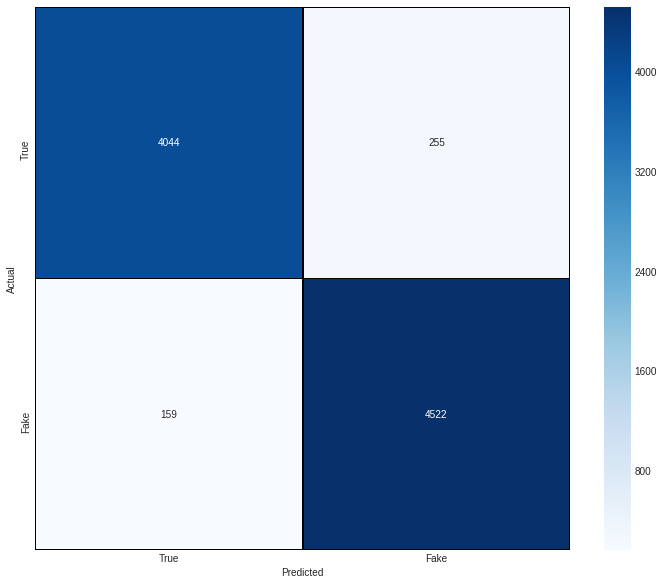

In [53]:
plt.figure(figsize = (12,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , 
            xticklabels = ['True','Fake'] , yticklabels = ['True','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual");

# Interpretation

In [55]:
import shap

attrib_data = train_matrix[:10000]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 2000
shap_vals = explainer.shap_values(test_matrix[:num_explanations])
# num2word = {}
# for w in tokenizer.word_index.keys():
#     num2word[tokenizer.word_index[w]] = w
# x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_pad[i]))) for i in range(200)])


You have provided over 5k background samples! For better performance consider using smaller random sample.


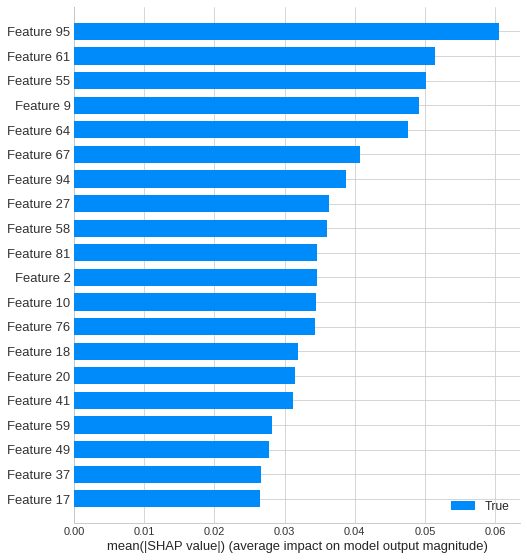

In [56]:
shap.summary_plot(shap_vals, class_names=['True','Fake'])

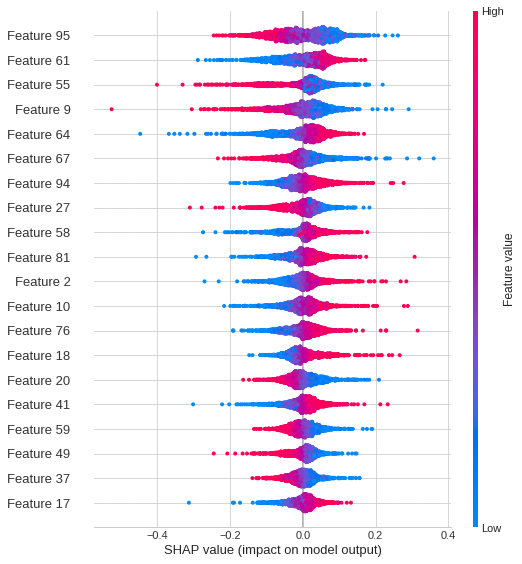

In [57]:
shap.summary_plot(shap_vals[0], test_matrix[:num_explanations])

In [58]:
shap_vals_arr = np.array(shap_vals)
shap_vals_arr.shape

(1, 2000, 100)

In [59]:
shap_vals_global = shap_vals_arr.mean(axis=1)
shap_vals_global.shape

(1, 100)

In [63]:
test_voc = []
for x in X_test_pad[:num_explanations]:
    test_voc.extend(x)
    
test_voc = list(set(test_voc))
len(test_voc)

20531

In [66]:
test_embedding_matrix = []
for t in test_voc:
    if t <= embedding_matrix.shape[1]:
        test_embedding_matrix.append(embedding_matrix[t])
    else:
        test_embedding_matrix.append(np.zeros(100))
test_embedding_matrix = np.array(test_embedding_matrix)
test_embedding_matrix.shape

(20531, 100)

In [67]:
shap_class_word = np.dot(shap_vals_global, test_embedding_matrix.T)
shap_class_word.shape

(1, 20531)

In [69]:
idx = np.argpartition(shap_class_word[0], -50)[-50:]
sorted_idx = idx[np.argsort(shap_class_word[0][idx])]

word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in sorted_idx:
    print(word_lookup[i])

make
even
video
ask
show
media
state
bill
via
democrat
news
support
would
new
trump
could
like
u
plan
told
back
us
work
help
leader
made
court
nation
week
donald
law
report
accord
said
america
year
right
former
million
month
member
statement
last
first
american
percent
attack
north
unit
group


In [33]:
explainer.expected_value

array([0.512337], dtype=float32)

In [34]:
# init the JS visualization code
shap.initjs()
input_num=2

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num])

In [38]:
input_num=20

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [39]:
input_num=10

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [40]:
input_num=30

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [41]:
input_num=100

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [42]:
input_num=50

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [43]:
input_num=45

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [44]:
input_num=90

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [45]:
input_num=123

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [46]:
input_num=68

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [47]:
input_num=99

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [48]:
input_num=33

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [49]:
input_num=88

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [50]:
input_num=128

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [51]:
input_num=199
print(X_test[199])
shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

[5687, 7675, 4659, 3509, 1, 310, 311, 40525, 6041, 455, 63, 207, 26, 452, 2663, 22, 1, 65, 311, 260, 252, 54, 916, 241, 41, 61, 1, 199, 64, 2939, 24, 1407, 26, 7, 595, 42, 64, 366, 5636, 6649, 1289, 1643, 337, 1407, 1407, 26, 7, 22, 701, 1, 505, 685, 212, 1606, 2450, 1044, 239, 128, 65, 212, 581, 553, 64, 595, 42, 2514, 14, 4708, 75, 151, 584, 2697, 595, 42, 64, 30, 16, 149, 105, 4272, 2614, 419, 1442, 22, 701, 1, 505, 685, 171, 82, 539, 595, 42, 64, 101, 10, 476, 1720, 121, 1956, 46, 2012, 22, 701, 1, 505, 685, 1, 794, 311, 260, 794, 497, 1, 734, 351, 8185, 460, 1138, 2093, 5687, 7675, 14532, 460, 497, 967, 414, 898, 41, 8, 455, 63, 3928, 189, 3128, 14532, 1749, 1, 252, 916, 241, 460, 311, 260, 623, 26, 7, 71, 311, 260, 340, 112, 119, 12, 177, 19, 240, 59, 74, 14, 101, 257, 82, 760, 2, 161, 3509, 1, 133, 64, 351, 141, 311, 260, 4426, 2801, 4084, 919, 1059, 187, 385, 2925, 704, 74, 260, 483, 28, 3, 14532, 2, 204, 339, 201, 69, 311, 260, 1670, 1, 85, 260, 6, 182, 1328, 2051, 260, 6, 257

In [52]:
input_num=150

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [53]:
input_num=121

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [54]:
input_num=177

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])

In [55]:
input_num=77

shap.force_plot(explainer.expected_value[0], shap_vals[0][input_num], x_test_words[input_num])